# Sheridan Kamal

## Data Analysis and Visualization Master's Program Capstone Project, Spring 2021

### Project Dataset Formation

Pull FRED Data from Quandl and Load S&P 500 Data from CSV (Downloaded from Yahoo! Finance)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import quandl as qnd

tbond_10yr = qnd.get('FRED/GS10')
tbond_10yr_pchange = qnd.get('FRED/GS10', transformation = "rdiff") #Percent change transformation
spread_2yr = qnd.get('FRED/T10Y2YM')
fedrate = qnd.get('FRED/FEDFUNDS')
fedrate_pchange = qnd.get('FRED/FEDFUNDS', transformation = "rdiff") #Percent change transformation
nonfarm_payrolls = qnd.get('FRED/PAYEMS')
nonfarm_payrolls_pchange = qnd.get('FRED/PAYEMS', transformation = "rdiff") #Percent change transformation
cpi = qnd.get('FRED/CPIAUCSL')
cpi_pchange = qnd.get('FRED/CPIAUCSL', transformation = "rdiff") #Percent change transformation
recessions = qnd.get('FRED/USREC')
snp_500 = pd.read_csv('S&P 500 Index.csv', sep = ',', parse_dates = ['Date'], index_col = 'Date') #Four columns of percent change transformations

Join Data into a Single DataFrame

In [2]:
df = pd.concat([tbond_10yr, tbond_10yr_pchange, spread_2yr, fedrate, fedrate_pchange, nonfarm_payrolls, nonfarm_payrolls_pchange, cpi, cpi_pchange], axis = 1, join = 'inner')
df.columns = ['10yr Tbond', '% Change Tbond', '2yr Spread', 'Fedrate', '% Change Fedrate', 'Nonfarm Payrolls', '% Change Payrolls', 'CPI', '% Change CPI']
df.head()

,10yr Tbond,% Change Tbond,2yr Spread,Fedrate,% Change Fedrate,Nonfarm Payrolls,% Change Payrolls,CPI,% Change CPI
Date,,,,,,,,,
1976-06-01,7.86,-0.005063,0.80,5.48,0.035917,79376.0,0.000807,56.7,0.005319
1976-07-01,7.83,-0.003817,0.98,5.31,-0.031022,79547.0,0.002154,57.0,0.005291
1976-08-01,7.77,-0.007663,1.14,5.29,-0.003766,79704.0,0.001974,57.3,0.005263
1976-09-01,7.59,-0.023166,1.17,5.25,-0.007561,79892.0,0.002359,57.6,0.005236
1976-10-01,7.41,-0.023715,1.43,5.02,-0.043810,79911.0,0.000238,57.9,0.005208


In [3]:
df = df.join(snp_500, how = 'inner')
df = df.join(recessions, how = 'inner')
df.columns = ['10yr Tbond', '% Change Tbond', '2yr Spread', 'Fedrate', '% Change Fedrate', 'Nonfarm Payrolls', '% Change Payrolls', 'CPI', '% Change CPI', 'S&P 500', '% Change 1M', '% Change 3M', '% Change 6M', '% Change 12M', 'Recession']
df.tail()

,10yr Tbond,% Change Tbond,2yr Spread,Fedrate,% Change Fedrate,Nonfarm Payrolls,% Change Payrolls,CPI,% Change CPI,S&P 500,% Change 1M,% Change 3M,% Change 6M,% Change 12M,Recession
Date,,,,,,,,,,,,,,,
2020-11-01,0.87,0.101266,0.70,0.09,0.000000,142809.0,0.001852,260.927,0.001785,3621.63,0.107546,0.034660,0.189639,0.153025,1.0
2020-12-01,0.93,0.068966,0.79,0.09,0.000000,142503.0,-0.002143,261.560,0.002426,3756.07,0.037121,0.116881,0.211522,0.162589,1.0
2021-01-01,1.08,0.161290,0.95,0.09,0.000000,142736.0,0.001635,262.231,0.002565,3714.24,-0.011137,0.135867,0.135464,0.151517,1.0
2021-02-01,1.26,0.166667,1.14,0.08,-0.111111,143204.0,0.003279,263.161,0.003546,3811.15,0.026091,0.052330,0.088804,0.290070,1.0
2021-03-01,1.61,0.277778,1.46,0.07,-0.125000,144120.0,0.006396,264.793,0.006202,3972.89,0.042439,0.057725,0.181353,0.555014,1.0


Create Correlation Heat map for Feature Selection

<AxesSubplot:>

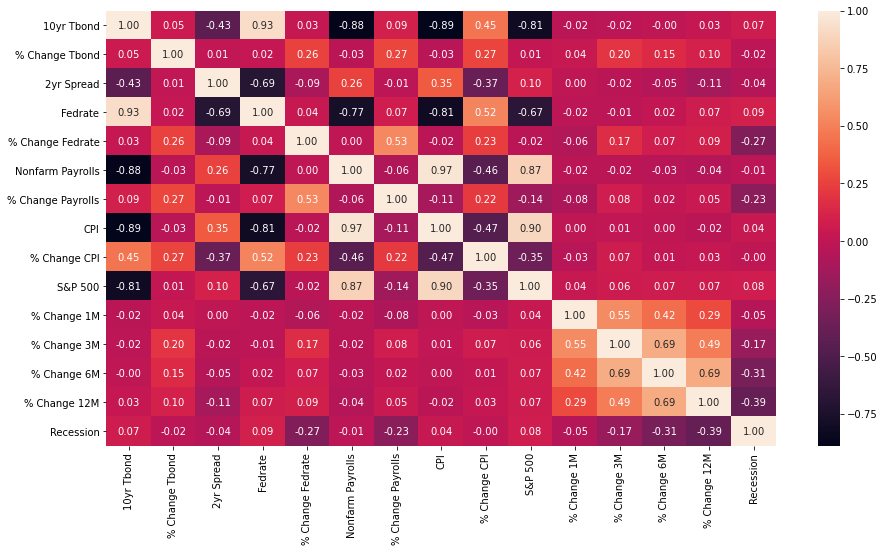

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")

Create Final Dataset from Selected Features

In [5]:
data = df.drop(['% Change Tbond', 'Fedrate', 'Nonfarm Payrolls', '% Change CPI', 'S&P 500', '% Change 1M', '% Change 3M', '% Change 6M'], axis = 1)
data.to_csv('Project Dataset.csv')
data.head()

,10yr Tbond,2yr Spread,% Change Fedrate,% Change Payrolls,CPI,% Change 12M,Recession
Date,,,,,,,
1976-06-01,7.86,0.80,0.035917,0.000807,56.7,0.095493,0.0
1976-07-01,7.83,0.98,-0.031022,0.002154,57.0,0.165521,0.0
1976-08-01,7.77,1.14,-0.003766,0.001974,57.3,0.184507,0.0
1976-09-01,7.59,1.17,-0.007561,0.002359,57.6,0.254799,0.0
1976-10-01,7.41,1.43,-0.043810,0.000238,57.9,0.155660,0.0


### About the Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 539 entries, 1976-06-01 to 2021-03-01
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   10yr Tbond         539 non-null    float64
 1   2yr Spread         539 non-null    float64
 2   % Change Fedrate   539 non-null    float64
 3   % Change Payrolls  539 non-null    float64
 4   CPI                539 non-null    float64
 5   % Change 12M       539 non-null    float64
 6   Recession          539 non-null    float64
dtypes: float64(7)
memory usage: 33.7 KB


In [7]:
data.Recession.value_counts(normalize = True) #Percentage of each label

0.0    0.87013
1.0    0.12987
Name: Recession, dtype: float64

In [8]:
data.describe()

,10yr Tbond,2yr Spread,% Change Fedrate,% Change Payrolls,CPI,% Change 12M,Recession
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,6.059332,0.926772,-0.000327,0.000878,165.437399,0.096023,0.129870
std,3.316229,0.904378,0.123733,0.008853,58.449662,0.155999,0.336473
min,0.620000,-2.130000,-0.923077,-0.137092,56.700000,-0.447562,0.000000
25%,3.390000,0.250000,-0.026546,0.000441,114.500000,0.014011,0.000000
50%,5.740000,0.850000,0.000000,0.001419,164.100000,0.109103,0.000000
75%,8.130000,1.560000,0.029518,0.002293,217.433000,0.189224,0.000000
max,15.320000,2.830000,1.000000,0.036438,264.793000,0.555014,1.000000


### Training Data, Testing Data, and Cross Validation Data Splits

In [9]:
#70/30 sequential train-test split
from sklearn.model_selection import train_test_split

X = data.iloc[:, 0:-1]
y = data.loc[:, 'Recession']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=False, random_state=1)

In [10]:
#For cross validation
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

index = 1
for train_index, test_index in tscv.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    print('Split %d.' % index, 'Training set observations: %d,' % len(train_index), 'Testing set observations: %d' % len(test_index))
    index += 1

Split 1. Training set observations: 94, Testing set observations: 89
Split 2. Training set observations: 183, Testing set observations: 89
Split 3. Training set observations: 272, Testing set observations: 89
Split 4. Training set observations: 361, Testing set observations: 89
Split 5. Training set observations: 450, Testing set observations: 89


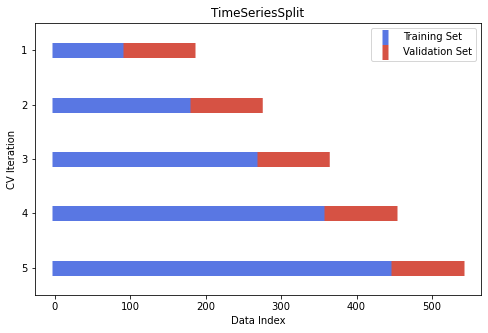

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

for ii, (tr, tt) in enumerate(tscv.split(X, y)):
    l1 = ax.scatter(tr, [ii+1] * len(tr), c=[plt.cm.coolwarm(.1)], marker='_', lw=15)
    l2 = ax.scatter(tt, [ii+1] * len(tt), c=[plt.cm.coolwarm(.9)], marker='_', lw=15)
    ax.set(ylim=[5.5, 0.5], title='TimeSeriesSplit', xlabel='Data Index', ylabel='CV Iteration')
    ax.legend([l1, l2], ['Training Set', 'Validation Set'])

### Logistic Regression Models

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logpredict = logreg.predict(X_test)

print("Unscaled Logistic Regression Accuracy: {:.2f}%".format(logreg.score(X_test, y_test)*100))
print(classification_report(y_test, logpredict))

Unscaled Logistic Regression Accuracy: 80.25%
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       130
         1.0       0.00      0.00      0.00        32

    accuracy                           0.80       162
   macro avg       0.40      0.50      0.45       162
weighted avg       0.64      0.80      0.71       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

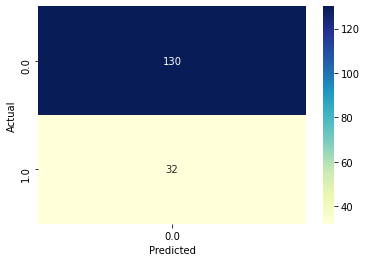

In [13]:
confusion_matrix = pd.crosstab(y_test, logpredict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

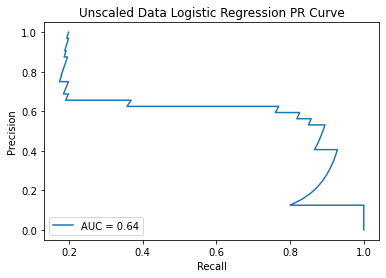

In [14]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

logreg_pr_auc = average_precision_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Logistic Regression PR Curve')
plt.legend(loc="lower left")
plt.show()

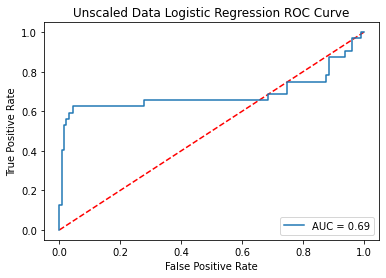

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [16]:
c_space = np.logspace(-5, 2, 50)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

logreg_cv = GridSearchCV(logreg, param_grid, cv=tscv, n_jobs=-1)

logreg_cv.fit(X_train, y_train)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Tuned Logistic Regression Accuracy: {:.2f}%".format(logreg_cv.best_score_*100))
print(classification_report(y_test, logreg_cv.predict(X_test)))

Tuned Logistic Regression Parameters: {'C': 1e-05, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 91.29%
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       130
         1.0       0.00      0.00      0.00        32

    accuracy                           0.80       162
   macro avg       0.40      0.50      0.45       162
weighted avg       0.64      0.80      0.71       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

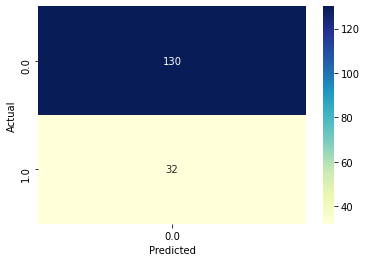

In [17]:
confusion_matrix = pd.crosstab(y_test, logreg_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

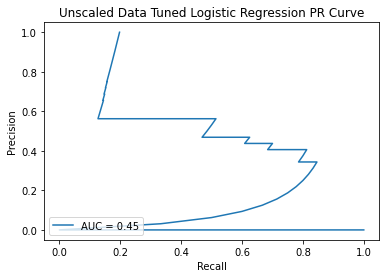

In [18]:
logreg_pr_auc = average_precision_score(y_test, logreg_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, logreg_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Tuned Logistic Regression PR Curve')
plt.legend(loc="lower left")
plt.show()

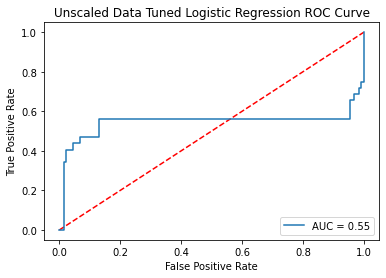

In [19]:
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

logreg_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Tuned Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),
        ('LogReg', LogisticRegression())]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

logpredict_scaled = pipeline.predict(X_test)

print("Scaled Logistic Regression Accuracy: {:.2f}%".format(pipeline.score(X_test, y_test)*100))
print(classification_report(y_test, logpredict_scaled))

Scaled Logistic Regression Accuracy: 87.65%
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       130
         1.0       0.93      0.41      0.57        32

    accuracy                           0.88       162
   macro avg       0.90      0.70      0.75       162
weighted avg       0.88      0.88      0.86       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

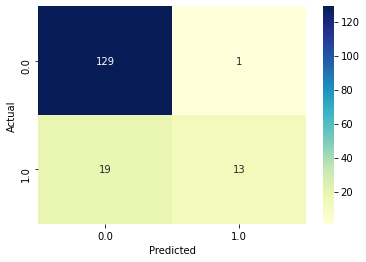

In [21]:
confusion_matrix = pd.crosstab(y_test, logpredict_scaled, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

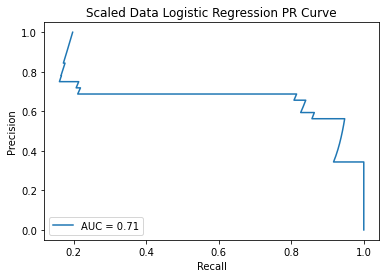

In [22]:
logreg_scaled_pr_auc = average_precision_score(y_test, pipeline.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Logistic Regression PR Curve')
plt.legend(loc="lower left")
plt.show()

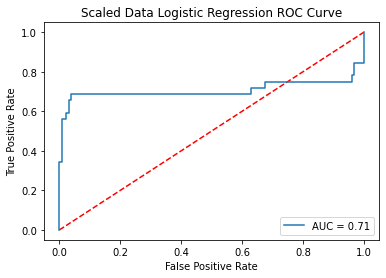

In [23]:
y_pred_prob_scaled = pipeline.predict_proba(X_test)[:,1]

logreg_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
steps = [('scaler', StandardScaler()),
        ('LogReg', LogisticRegression())]

parameters = {'LogReg__C': c_space, 'LogReg__penalty': ['l1', 'l2']}

pipeline = Pipeline(steps)

logreg_scaled_cv = GridSearchCV(pipeline, parameters, cv=tscv, n_jobs=-1)

logreg_scaled_cv.fit(X_train, y_train)

print("Tuned Logistic Regression with Scaled Parameters: {}".format(logreg_scaled_cv.best_params_)) 
print('Tuned Logistic Regression with Scaled Accuracy: {:.2f}%'.format(logreg_scaled_cv.score(X_test, y_test)*100))
print(classification_report(y_test, logreg_scaled_cv.predict(X_test)))

Tuned Logistic Regression with Scaled Parameters: {'LogReg__C': 1.0, 'LogReg__penalty': 'l2'}
Tuned Logistic Regression with Scaled Accuracy: 87.65%
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       130
         1.0       0.93      0.41      0.57        32

    accuracy                           0.88       162
   macro avg       0.90      0.70      0.75       162
weighted avg       0.88      0.88      0.86       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

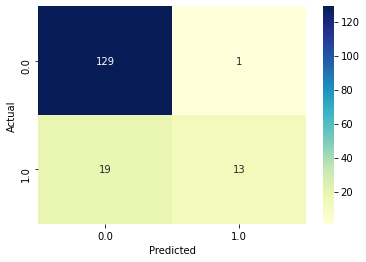

In [25]:
confusion_matrix = pd.crosstab(y_test, logreg_scaled_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

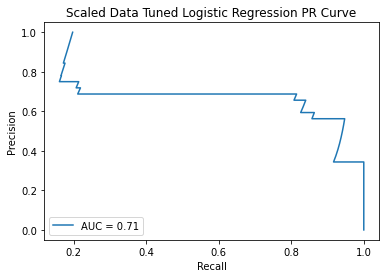

In [26]:
logreg_scaled_pr_auc = average_precision_score(y_test, logreg_scaled_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, logreg_scaled_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Tuned Logistic Regression PR Curve')
plt.legend(loc="lower left")
plt.show()

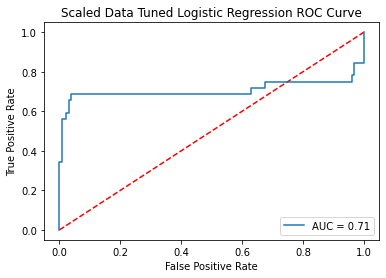

In [27]:
y_pred_prob_scaled = logreg_scaled_cv.predict_proba(X_test)[:,1]

logreg_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % logreg_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Tuned Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Decision Tree Classifier Models

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

treepredict = tree.predict(X_test)

print("Unscaled Decision Tree Accuracy: {:.2f}%".format(tree.score(X_test, y_test)*100))
print(classification_report(y_test, treepredict))

Unscaled Decision Tree Accuracy: 84.57%
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       130
         1.0       1.00      0.22      0.36        32

    accuracy                           0.85       162
   macro avg       0.92      0.61      0.64       162
weighted avg       0.87      0.85      0.80       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

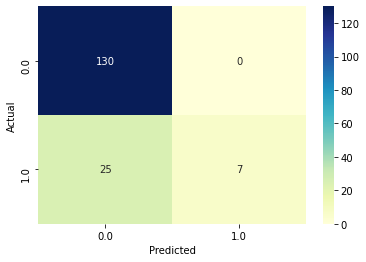

In [29]:
confusion_matrix = pd.crosstab(y_test, treepredict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

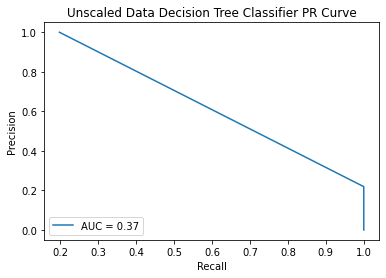

In [30]:
tree_pr_auc = average_precision_score(y_test, tree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, tree.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Decision Tree Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

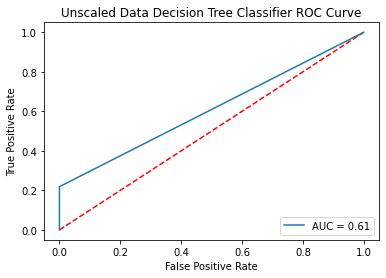

In [31]:
y_pred_prob = tree.predict_proba(X_test)[:,1]

tree_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Decision Tree Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
param_dist = {"max_depth": [1],
              "max_features": range(1, 10),
              "min_samples_leaf": range(1, 10),
              "criterion": ["gini", "entropy"]}

tree_cv = GridSearchCV(tree, param_dist, cv=tscv, n_jobs=-1)

tree_cv.fit(X_train, y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Tuned Decision Tree Accuracy: {:.2f}%".format(tree_cv.best_score_*100))
print(classification_report(y_test, tree_cv.predict(X_test)))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1}
Tuned Decision Tree Accuracy: 95.16%
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       130
         1.0       0.76      0.59      0.67        32

    accuracy                           0.88       162
   macro avg       0.83      0.77      0.80       162
weighted avg       0.88      0.88      0.88       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

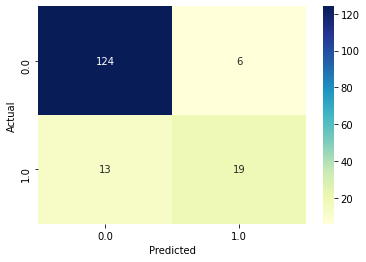

In [33]:
confusion_matrix = pd.crosstab(y_test, tree_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

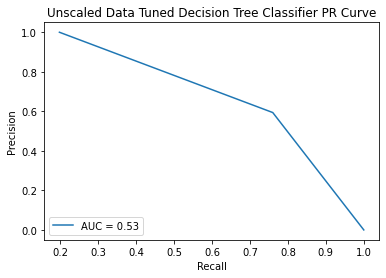

In [34]:
tree_pr_auc = average_precision_score(y_test, tree_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, tree_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Tuned Decision Tree Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

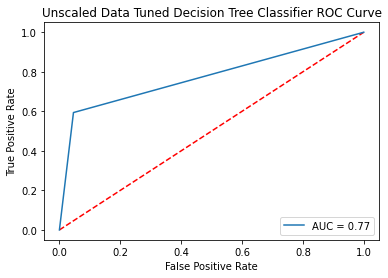

In [35]:
y_pred_prob = tree_cv.predict_proba(X_test)[:,1]

tree_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Tuned Decision Tree Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [36]:
steps = [('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier())]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

treepredict_scaled = pipeline.predict(X_test)

print("Scaled Decision Tree Accuracy: {:.2f}%".format(pipeline.score(X_test, y_test)*100))
print(classification_report(y_test, treepredict_scaled))

Scaled Decision Tree Accuracy: 87.04%
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       130
         1.0       1.00      0.34      0.51        32

    accuracy                           0.87       162
   macro avg       0.93      0.67      0.72       162
weighted avg       0.89      0.87      0.84       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

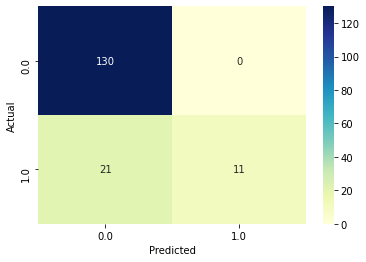

In [37]:
confusion_matrix = pd.crosstab(y_test, treepredict_scaled, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

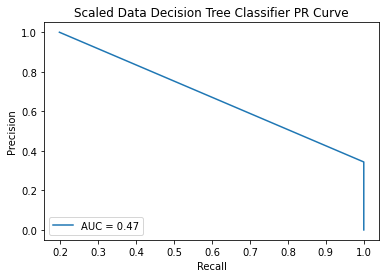

In [38]:
tree_scaled_pr_auc = average_precision_score(y_test, pipeline.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Decision Tree Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

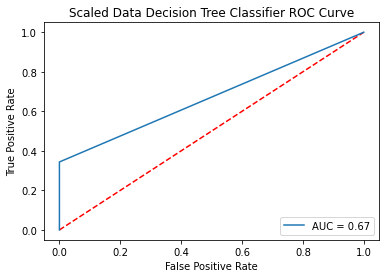

In [39]:
y_pred_prob_scaled = pipeline.predict_proba(X_test)[:,1]

tree_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Decision Tree Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [40]:
steps = [('scaler', StandardScaler()),
        ('TreeClass', DecisionTreeClassifier())]

parameter = {"TreeClass__max_depth": [1],
              "TreeClass__max_features": range(1, 10),
              "TreeClass__min_samples_leaf": range(1, 10),
              "TreeClass__criterion": ["gini", "entropy"]}

pipeline = Pipeline(steps)

tree_scaled_cv = GridSearchCV(pipeline, parameter, cv=tscv, n_jobs=-1)

tree_scaled_cv.fit(X_train, y_train)

print("Tuned Decision Tree with Scaled Parameters: {}".format(tree_scaled_cv.best_params_)) 
print('Tuned Decision Tree with Scaled Accuracy: {:.2f}%'.format(tree_scaled_cv.score(X_test, y_test)*100))
print(classification_report(y_test, tree_scaled_cv.predict(X_test)))

Tuned Decision Tree with Scaled Parameters: {'TreeClass__criterion': 'gini', 'TreeClass__max_depth': 1, 'TreeClass__max_features': 3, 'TreeClass__min_samples_leaf': 4}
Tuned Decision Tree with Scaled Accuracy: 88.27%
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       130
         1.0       0.76      0.59      0.67        32

    accuracy                           0.88       162
   macro avg       0.83      0.77      0.80       162
weighted avg       0.88      0.88      0.88       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

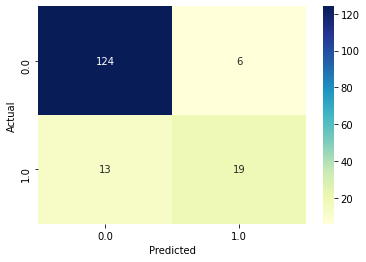

In [41]:
confusion_matrix = pd.crosstab(y_test, tree_scaled_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

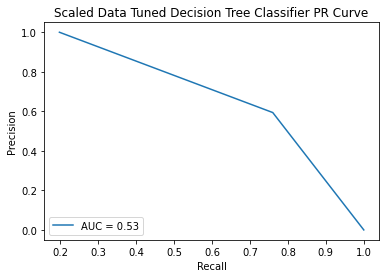

In [42]:
tree_scaled_pr_auc = average_precision_score(y_test, tree_scaled_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, tree_scaled_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Tuned Decision Tree Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

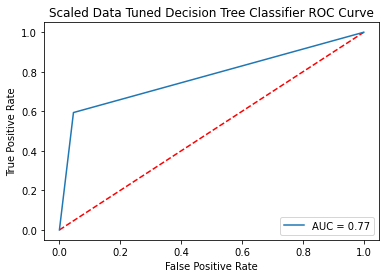

In [43]:
y_pred_prob_scaled = tree_scaled_cv.predict_proba(X_test)[:,1]

tree_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % tree_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Tuned Decision Tree Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

### K Nearest Neighbors Classifier Models

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

kncpredict = knc.predict(X_test)

print("Unscaled K Nearest Neighbors Classifier Accuracy: {:.2f}%".format(knc.score(X_test, y_test)*100))
print(classification_report(y_test, kncpredict))

Unscaled K Nearest Neighbors Classifier Accuracy: 80.25%
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       130
         1.0       0.00      0.00      0.00        32

    accuracy                           0.80       162
   macro avg       0.40      0.50      0.45       162
weighted avg       0.64      0.80      0.71       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

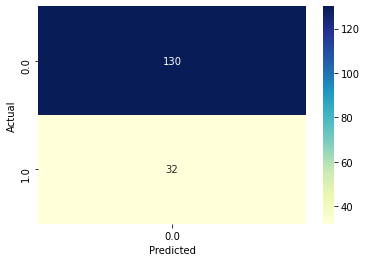

In [45]:
confusion_matrix = pd.crosstab(y_test, kncpredict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

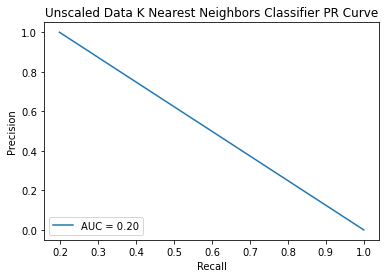

In [46]:
knc_pr_auc = average_precision_score(y_test, knc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, knc.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data K Nearest Neighbors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

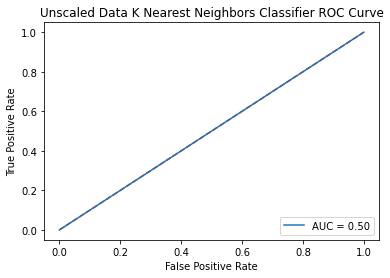

In [47]:
knc_roc_auc = roc_auc_score(y_test, knc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, knc.predict_proba(X_test)[:,1])

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data K Nearest Neighbors Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [48]:
k = range(1, 21)
parameters = {'n_neighbors': k}

knc_cv = GridSearchCV(knc, parameters, cv=tscv, n_jobs=-1)

knc_cv.fit(X_train, y_train)

print("Tuned K Nearest Neighbors Classifier Parameters: {}".format(knc_cv.best_params_)) 
print("Tuned K Nearest Neighbors Classifier Accuracy: {:.2f}%".format(knc_cv.best_score_*100))
print(classification_report(y_test, knc_cv.predict(X_test)))

Tuned K Nearest Neighbors Classifier Parameters: {'n_neighbors': 10}
Tuned K Nearest Neighbors Classifier Accuracy: 91.29%
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       130
         1.0       0.00      0.00      0.00        32

    accuracy                           0.80       162
   macro avg       0.40      0.50      0.45       162
weighted avg       0.64      0.80      0.71       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

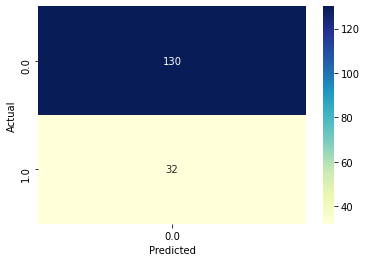

In [49]:
confusion_matrix = pd.crosstab(y_test, knc_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

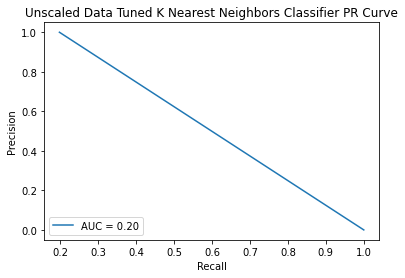

In [50]:
knc_pr_auc = average_precision_score(y_test, knc_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, knc_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Tuned K Nearest Neighbors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

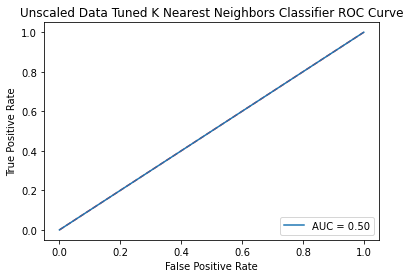

In [51]:
y_pred_prob = knc_cv.predict_proba(X_test)[:,1]

knc_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Tuned K Nearest Neighbors Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
steps = [('scaler', StandardScaler()),
        ('KNC', KNeighborsClassifier())]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

kncpredict_scaled = pipeline.predict(X_test)

print("Scaled K Nearest Neighbors Classifier Accuracy: {:.2f}%".format(pipeline.score(X_test, y_test)*100))
print(classification_report(y_test, kncpredict_scaled))

Scaled K Nearest Neighbors Classifier Accuracy: 87.65%
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       130
         1.0       0.93      0.41      0.57        32

    accuracy                           0.88       162
   macro avg       0.90      0.70      0.75       162
weighted avg       0.88      0.88      0.86       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

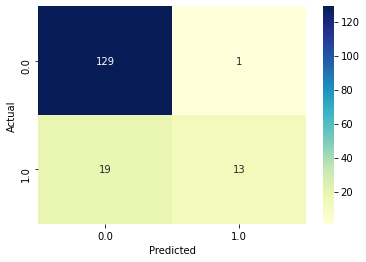

In [53]:
confusion_matrix = pd.crosstab(y_test, kncpredict_scaled, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

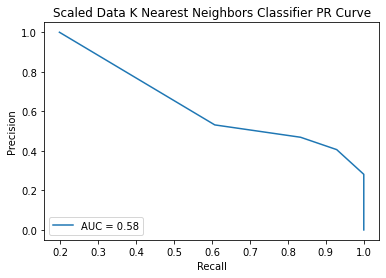

In [54]:
knc_scaled_pr_auc = average_precision_score(y_test, pipeline.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data K Nearest Neighbors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

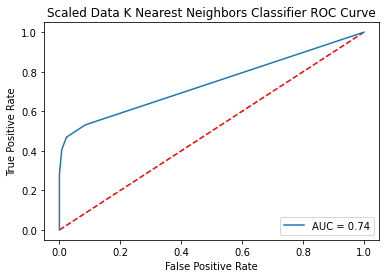

In [55]:
y_pred_prob_scaled = pipeline.predict_proba(X_test)[:,1]

knc_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data K Nearest Neighbors Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [56]:
steps = [('scaler', StandardScaler()),
        ('KNC', KNeighborsClassifier())]

k = range(1, 21)
parameters = {'KNC__n_neighbors': k}

pipeline = Pipeline(steps)

knc_scaled_cv = GridSearchCV(pipeline, parameters, cv=tscv, n_jobs=-1)

knc_scaled_cv.fit(X_train, y_train)

print("Tuned K Nearest Neighbors Classifier with Scaled Parameters: {}".format(knc_scaled_cv.best_params_)) 
print('Tuned K Nearest Neighbors Classifier with Scaled Accuracy: {:.2f}%'.format(knc_scaled_cv.score(X_test, y_test)*100))
print(classification_report(y_test, knc_scaled_cv.predict(X_test)))

Tuned K Nearest Neighbors Classifier with Scaled Parameters: {'KNC__n_neighbors': 3}
Tuned K Nearest Neighbors Classifier with Scaled Accuracy: 87.65%
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       130
         1.0       0.93      0.41      0.57        32

    accuracy                           0.88       162
   macro avg       0.90      0.70      0.75       162
weighted avg       0.88      0.88      0.86       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

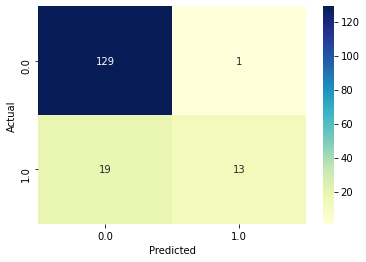

In [57]:
confusion_matrix = pd.crosstab(y_test, knc_scaled_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

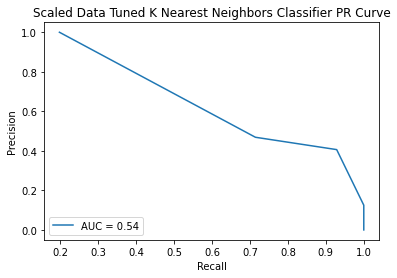

In [58]:
knc_scaled_pr_auc = average_precision_score(y_test, knc_scaled_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, knc_scaled_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Tuned K Nearest Neighbors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

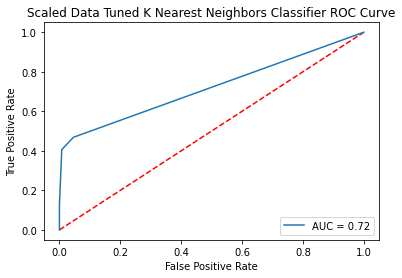

In [59]:
y_pred_prob_scaled = knc_scaled_cv.predict_proba(X_test)[:,1]

knc_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % knc_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Tuned K Nearest Neighbors Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Support Vector Classifier

In [60]:
from sklearn.svm import SVC

svc = SVC(probability=True, random_state=1)

svc.fit(X_train, y_train)

svcpredict = svc.predict(X_test)

print("Unscaled Support Vector Classifier Accuracy: {:.2f}%".format(svc.score(X_test, y_test)*100))
print(classification_report(y_test, svcpredict))

Unscaled Support Vector Classifier Accuracy: 80.25%
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       130
         1.0       0.00      0.00      0.00        32

    accuracy                           0.80       162
   macro avg       0.40      0.50      0.45       162
weighted avg       0.64      0.80      0.71       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

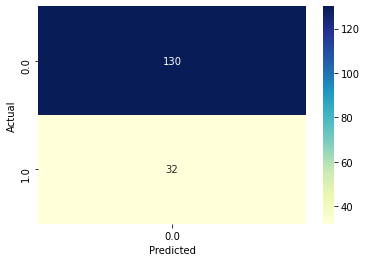

In [61]:
confusion_matrix = pd.crosstab(y_test, svcpredict, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

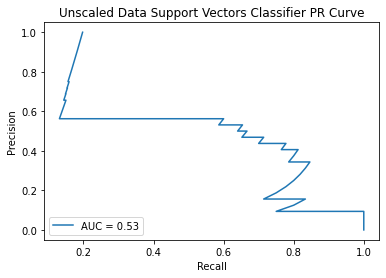

In [62]:
svc_pr_auc = average_precision_score(y_test, svc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, svc.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Support Vectors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

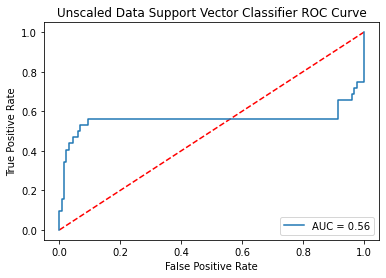

In [63]:
svc_roc_auc = roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, svc.predict_proba(X_test)[:,1])

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Support Vector Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [64]:
c_space = np.logspace(-5, 2, 50)
param_grid = {'C': c_space, 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']}

svc_cv = GridSearchCV(svc, param_grid, cv=tscv, n_jobs=-1)

svc_cv.fit(X_train, y_train)

print("Tuned Support Vector Classifier Parameters: {}".format(svc_cv.best_params_)) 
print("Tuned Support Vector Classifier Accuracy: {:.2f}%".format(svc_cv.best_score_*100))
print(classification_report(y_test, svc_cv.predict(X_test)))

Tuned Support Vector Classifier Parameters: {'C': 0.5179474679231213, 'gamma': 'auto', 'kernel': 'rbf'}
Tuned Support Vector Classifier Accuracy: 92.90%
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89       130
         1.0       0.00      0.00      0.00        32

    accuracy                           0.80       162
   macro avg       0.40      0.50      0.45       162
weighted avg       0.64      0.80      0.71       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

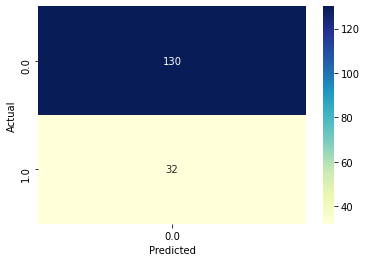

In [65]:
confusion_matrix = pd.crosstab(y_test, svc_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

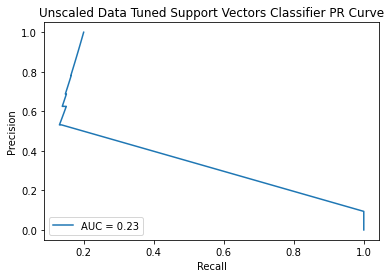

In [66]:
svc_pr_auc = average_precision_score(y_test, svc_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, svc_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Unscaled Data Tuned Support Vectors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

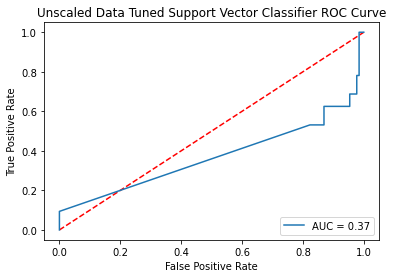

In [67]:
y_pred_prob = svc_cv.predict_proba(X_test)[:,1]

svc_roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Unscaled Data Tuned Support Vector Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [68]:
steps = [('scaler', StandardScaler()),
        ('SVC', SVC(probability=True, random_state=1))]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

svcpredict_scaled = pipeline.predict(X_test)

print("Scaled Support Vector Classifier Accuracy: {:.2f}%".format(pipeline.score(X_test, y_test)*100))
print(classification_report(y_test, svcpredict_scaled))

Scaled Support Vector Classifier Accuracy: 81.48%
              precision    recall  f1-score   support

         0.0       0.82      0.99      0.90       130
         1.0       0.75      0.09      0.17        32

    accuracy                           0.81       162
   macro avg       0.78      0.54      0.53       162
weighted avg       0.80      0.81      0.75       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

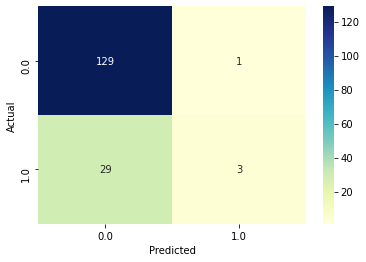

In [69]:
confusion_matrix = pd.crosstab(y_test, svcpredict_scaled, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

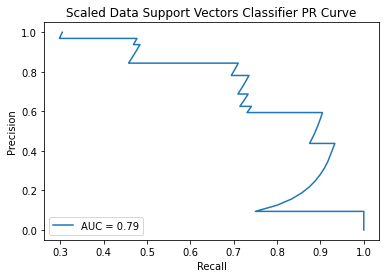

In [70]:
svc_scaled_pr_auc = average_precision_score(y_test, pipeline.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, pipeline.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Support Vectors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

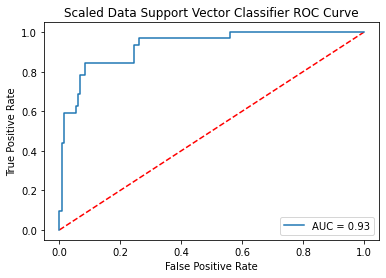

In [71]:
y_pred_prob_scaled = pipeline.predict_proba(X_test)[:,1]

svc_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Support Vector Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [72]:
steps = [('scaler', StandardScaler()),
        ('SVC', SVC(probability=True, random_state=1))]

c_space = np.logspace(-5, 2, 50)
param_grid = {'SVC__C': c_space, 'SVC__kernel': ['linear', 'rbf', 'sigmoid'], 'SVC__gamma': ['scale', 'auto']}

pipeline = Pipeline(steps)

svc_scaled_cv = GridSearchCV(pipeline, param_grid, cv=tscv, n_jobs=-1)

svc_scaled_cv.fit(X_train, y_train)

print("Tuned Support Vector Classifier with Scaled Parameters: {}".format(svc_scaled_cv.best_params_)) 
print('Tuned Support Vector Classifier with Scaled Accuracy: {:.2f}%'.format(svc_scaled_cv.score(X_test, y_test)*100))
print(classification_report(y_test, svc_scaled_cv.predict(X_test)))

Tuned Support Vector Classifier with Scaled Parameters: {'SVC__C': 10.0, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}
Tuned Support Vector Classifier with Scaled Accuracy: 83.95%
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       130
         1.0       1.00      0.19      0.32        32

    accuracy                           0.84       162
   macro avg       0.92      0.59      0.61       162
weighted avg       0.87      0.84      0.79       162



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

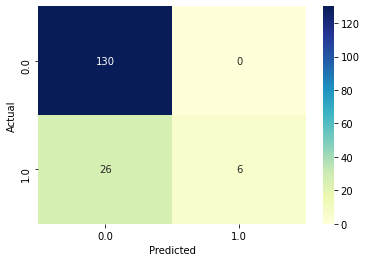

In [73]:
confusion_matrix = pd.crosstab(y_test, svc_scaled_cv.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="YlGnBu")

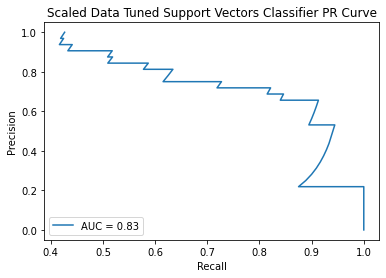

In [74]:
svc_scaled_pr_auc = average_precision_score(y_test, svc_scaled_cv.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = precision_recall_curve(y_test, svc_scaled_cv.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_scaled_pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Scaled Data Tuned Support Vectors Classifier PR Curve')
plt.legend(loc="lower left")
plt.show()

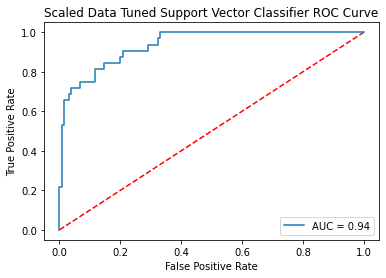

In [75]:
y_pred_prob_scaled = svc_scaled_cv.predict_proba(X_test)[:,1]

svc_scaled_roc_auc = roc_auc_score(y_test, y_pred_prob_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_scaled)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = %0.2f' % svc_scaled_roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Scaled Data Tuned Support Vector Classifier ROC Curve')
plt.legend(loc="lower right")
plt.show()